# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



In [1]:
#Check Python version
! python --version

Python 3.12.8


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\Capstone_Evaluating_Domestic_Electrification_Measures\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\Capstone_Evaluating_Domestic_Electrification_Measures'

# Section 1

Section 1 content

Import necessary Python Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read 2023 car database data obtained from Kaggle at
https://www.kaggle.com/datasets/kkhandekar/cheapest-electric-cars

which itself was scraped in 2023 from 
https://ev-database.org/ which may have later data.

Insufficient time to update with latter, but may be a future improvement as ecars are fast improving in price and technology.


In [6]:
df_ecars = pd.read_csv('Data/1_Raw/Cheapestelectriccars-EVDatabase_2023.csv')
df_ecars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0 sec,180 km/h,470 km,164 Wh/km,700 km/h,Rear Wheel Drive,5,"€55,000","£53,000"
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0 sec,180 km/h,520 km,165 Wh/km,800 km/h,Rear Wheel Drive,5,"€60,000","£56,000"
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4 sec,180 km/h,510 km,184 Wh/km,760 km/h,Rear Wheel Drive,5,"€60,000","£55,000"
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8 sec,200 km/h,475 km,198 Wh/km,710 km/h,All Wheel Drive,5,"€65,000","£60,000"


In [7]:
df_ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             309 non-null    object
 1   Subtitle         309 non-null    object
 2   Acceleration     309 non-null    object
 3   TopSpeed         309 non-null    object
 4   Range            309 non-null    object
 5   Efficiency       309 non-null    object
 6   FastChargeSpeed  309 non-null    object
 7   Drive            309 non-null    object
 8   NumberofSeats    309 non-null    int64 
 9   PriceinGermany   282 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.7+ KB


So UK price, battery size (called 'Subtitle above') and Range are all non numerical, containing a mix of text and numbers, from which the numerical data will need to be extracted into new numerical format columns to be of use in the analysis. 

In [8]:
# df_ecars.null_counts()
null_counts_per_column = df_ecars.isna().sum()
print("Null values per column:")
print(null_counts_per_column)

Null values per column:
Name                 0
Subtitle             0
Acceleration         0
TopSpeed             0
Range                0
Efficiency           0
FastChargeSpeed      0
Drive                0
NumberofSeats        0
PriceinGermany      27
PriceinUK          111
dtype: int64


So 111 of these cars have no UK prices so won't ne of help to us.  Have checked a few and indeed some are not for sale in the UK. Others are so I began investigating missing prices for some, e.g. for the Dacia Spring which is the cheapest electric car now (October 2025) on sale in the UK, as I thought it would be useful to include these in the dataset, but while doing so observed others have come down in price so adding the Dacia Spring and possibly changing a few prices observed along the way would be inconsistent with using 2023 data elsewhere, so I decided to omit this step for consistency.  As above ideally the whole table would be reviewed with more up to date data e.g. new cars on the market and often reduced prices in 2025.

Below I have removed rows with no UK costs. 

In [9]:
df_ecars = df_ecars.dropna(subset=['PriceinUK'])
df_ecars

# df_ecars.null_counts()
null_counts_per_column = df_ecars.isna().sum()
print("Null values per column:")
print(null_counts_per_column)

Null values per column:
Name               0
Subtitle           0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     9
PriceinUK          0
dtype: int64


Convert UK prices to integers to allow processing as numbers after £ sign are all integers.  Then apply £ and comma seperated format.

In [10]:
df_ecars['UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')
# df_ecars['UKPrice_£'] = df_ecars['UKPrice_£'].apply(lambda x: f"£{x:,}")
df_ecars[['PriceinUK', 'UKPrice_£']]

C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\748650672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')


,PriceinUK,UKPrice_£
1,"£142,400",142400
2,"£115,000",115000
5,"£59,990",59990
6,"£84,500",84500
7,"£29,995",29995
...,...,...
304,"£53,000",53000
305,"£56,000",56000
306,"£55,000",55000
307,"£60,000",60000


In [11]:
df_ecars[['PriceinUK', 'UKPrice_£']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 1 to 308
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PriceinUK  198 non-null    object
 1   UKPrice_£  198 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 4.8+ KB


Extract range km number from the strings in the 'Range' column, sort table in ascending range order and calculate range in mi also, rounding to integers as km are integers.

In [12]:

# df_ecars['Range_km'] = df_ecars['Range'].str.replace(' km', '').astype('Int64') gives same result but same warning as below
df_ecars['Range_km'] = df_ecars['Range'].str.split(' ').str[0].astype('Int64')
df_ecars.sort_values(by='Range_km', inplace=True)
df_ecars.reset_index(drop=True, inplace=True)
df_ecars['Range_mi']= (df_ecars['Range_km']*0.621371).round(0).astype('Int64')

C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\1022277068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['Range_km'] = df_ecars['Range'].str.split(' ').str[0].astype('Int64')
C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\1022277068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars.sort_values(by='Range_km', inplace=True)
C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\1022277068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

New Range_km and Range_mi column data checked in light of above warnings and is OK.  All integers with values seen to be in line with Range column in original dataset.

In [13]:

df_ecars[['Range', 'Range_km', 'Range_mi']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Range     198 non-null    object
 1   Range_km  198 non-null    Int64 
 2   Range_mi  198 non-null    Int64 
dtypes: Int64(2), object(1)
memory usage: 5.2+ KB


In [14]:
df_ecars[['Range_km', 'Range_mi']].describe()

,Range_km,Range_mi
count,198.0,198.0
mean,374.570707,232.757576
std,95.749475,59.493393
min,170.0,106.0
25%,310.0,193.0
50%,390.0,242.0
75%,440.0,273.0
max,640.0,398.0


In [15]:
pd.set_option('display.max_rows', 200)
df_ecars[['Range', 'Range_km', 'Range_mi']]

,Range,Range_km,Range_mi
0,170 km,170,106
1,170 km,170,106
2,170 km,170,106
3,180 km,180,112
4,180 km,180,112
5,180 km,180,112
6,180 km,180,112
7,180 km,180,112
8,180 km,180,112
9,185 km,185,115


In [16]:
pd.set_option('display.max_rows', 60)

In [17]:
df_ecars['Battery_kWh'] = df_ecars['Subtitle'].str.split(' ').str[0].astype('float')

C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\3651821096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['Battery_kWh'] = df_ecars['Subtitle'].str.split(' ').str[0].astype('float')


New Battery_kWh column data checked in light of above warnings and is OK.  All floats seen to be in line with Range column in original dataset.

In [18]:
df_ecars['Battery_kWh'].describe()

count    198.000000
mean      72.565657
std       19.797757
min       28.500000
25%       57.625000
50%       75.000000
75%       85.000000
max      108.400000
Name: Battery_kWh, dtype: float64

In [19]:
df_ecars[['Subtitle', 'Battery_kWh']]

,Subtitle,Battery_kWh
0,28.9 kWh useable battery Available si...,28.9
1,28.5 kWh useable battery Available si...,28.5
2,30 kWh useable battery Available sinc...,30.0
3,46.3 kWh useable battery Available si...,46.3
4,46.3 kWh useable battery Available si...,46.3
...,...,...
193,106 kWh useable battery Available sin...,106.0
194,95 kWh useable battery Available sinc...,95.0
195,107.8 kWh useable battery Available s...,107.8
196,95 kWh useable battery Available sinc...,95.0


Convert 'Efficiency' from text to kWh/km and check that it is similar to Battery_kWh/Range_km. The expected ratio between the two is 1.

In [20]:
df_ecars['Efficiency*1000'] = df_ecars['Efficiency'].str.split(' Wh').str[0].astype('float')/1000
df_ecars['Battery_kWh/Range_km']= (df_ecars['Battery_kWh']/df_ecars['Range_km']).round(3)
df_ecars['Efficiency_ratio'] = (df_ecars['Efficiency*1000']/df_ecars['Battery_kWh/Range_km'])
df_ecars[['Efficiency*1000', 'Battery_kWh/Range_km', 'Efficiency_ratio']]

C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\1540362508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['Efficiency*1000'] = df_ecars['Efficiency'].str.split(' Wh').str[0].astype('float')/1000
C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\1540362508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['Battery_kWh/Range_km']= (df_ecars['Battery_kWh']/df_ecars['Range_km']).round(3)
C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\1540362508.py:3: SettingWithCopyWarning: 
A valu

,Efficiency*1000,Battery_kWh/Range_km,Efficiency_ratio
0,0.170,0.17,1.0
1,0.168,0.168,1.0
2,0.176,0.176,1.0
3,0.257,0.257,1.0
4,0.257,0.257,1.0
...,...,...,...
193,0.202,0.202,1.0
194,0.173,0.173,1.0
195,0.191,0.191,1.0
196,0.167,0.167,1.0


In [21]:
df_ecars['Efficiency_ratio'].value_counts()

Efficiency_ratio
1.0         192
1.004329      3
1.005208      2
1.005236      1
Name: count, dtype: Int64

So the 'efficiency', battery capacity and range given in original dataset tie together well aside from a few minor anomalies, likely due to rounding.  So I will just use Battery_kwh and Range_km moving forward to calculate miles_per_kWh (akin to petrol miles per gallon) for analysis.

In [22]:
df_ecars['Efficiency_mi/kWh'] = (df_ecars['Range_mi']/df_ecars['Battery_kWh'])
df_ecars[['Efficiency_mi/kWh']]

C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\2005852840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['Efficiency_mi/kWh'] = (df_ecars['Range_mi']/df_ecars['Battery_kWh'])


,Efficiency_mi/kWh
0,3.66782
1,3.719298
2,3.533333
3,2.419006
4,2.419006
...,...
193,3.075472
194,3.6
195,3.25603
196,3.726316


Concatenate car range, battery size and index to facilitate a sort in order of ascending range, where this is the same, battery size, where the same price and where the same, index.  Then assign a new index.

In [23]:
df_ecars['RangeBatterySizeIndexConcatanate'] = 1000000000 * df_ecars['Range_mi']+1000000 * df_ecars['Battery_kWh'] +1000*df_ecars['UKPrice_£'] + 1* df_ecars.index
df_ecars = df_ecars.sort_values(by='RangeBatterySizeIndexConcatanate', ascending=True)
df_ecars.reset_index(drop=True, inplace=True)
df_ecars

C:\Users\jerem\AppData\Local\Temp\ipykernel_31048\3362253408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['RangeBatterySizeIndexConcatanate'] = 1000000000 * df_ecars['Range_mi']+1000000 * df_ecars['Battery_kWh'] +1000*df_ecars['UKPrice_£'] + 1* df_ecars.index


,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,UKPrice_£,Range_km,Range_mi,Battery_kWh,Efficiency*1000,Battery_kWh/Range_km,Efficiency_ratio,Efficiency_mi/kWh,RangeBatterySizeIndexConcatanate
0,Mazda MX-30,30 kWh useable battery Available sinc...,9.7 sec,140 km/h,170 km,176 Wh/km,210 km/h,Front Wheel Drive,5,"€35,990","£30,050",30050,170,106,30.0,0.176,0.176,1.0,3.533333,106060050002.0
1,Honda e Advance,28.5 kWh useable battery Available si...,8.3 sec,145 km/h,170 km,168 Wh/km,180 km/h,Rear Wheel Drive,4,"€39,900","£36,920",36920,170,106,28.5,0.168,0.168,1.0,3.719298,106065420001.0
2,Mini Cooper SE Convertible,28.9 kWh useable battery Available si...,8.2 sec,150 km/h,170 km,170 Wh/km,240 km/h,Front Wheel Drive,4,"€60,000","£52,500",52500,170,106,28.9,0.170,0.17,1.0,3.66782,106081400000.0
3,Mini Cooper SE,28.9 kWh useable battery Available si...,7.3 sec,150 km/h,180 km,161 Wh/km,260 km/h,Front Wheel Drive,4,"€35,700","£29,000",29000,180,112,28.9,0.161,0.161,1.0,3.875433,112057900008.0
4,Citroen e-Jumpy Combi XL 50 kWh,46.3 kWh useable battery Available si...,12.1 sec,130 km/h,180 km,257 Wh/km,290 km/h,Front Wheel Drive,7,"€52,730","£35,995",35995,180,112,46.3,0.257,0.257,1.0,2.419006,112082295004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Audi Q8 e-tron Sportback 55 quattro,106 kWh useable battery Available sin...,5.6 sec,200 km/h,525 km,202 Wh/km,710 km/h,All Wheel Drive,5,"€87,550","£80,300",80300,525,326,106.0,0.202,0.202,1.0,3.075472,326186300193.0
194,Tesla Model S Plaid,95 kWh useable battery Available sinc...,2.1 sec,282 km/h,550 km,173 Wh/km,770 km/h,All Wheel Drive,5,"€137,990","£125,000",125000,550,342,95.0,0.173,0.173,1.0,3.6,342220000194.0
195,Mercedes EQS AMG 53 4MATIC+,107.8 kWh useable battery Available s...,3.4 sec,250 km/h,565 km,191 Wh/km,840 km/h,All Wheel Drive,5,"€155,009","£161,860",161860,565,351,107.8,0.191,0.191,1.0,3.25603,351269660195.0
196,Tesla Model S Dual Motor,95 kWh useable battery Available sinc...,3.2 sec,250 km/h,570 km,167 Wh/km,790 km/h,All Wheel Drive,5,"€112,990","£100,000",100000,570,354,95.0,0.167,0.167,1.0,3.726316,354195000196.0


Reminder of all columns now in dataframe.  Will remove some as now redundant and keep some for info though they may not be used in the analysis, e.g. name, top speed etc.

In [24]:
df_ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              198 non-null    object 
 1   Subtitle                          198 non-null    object 
 2   Acceleration                      198 non-null    object 
 3   TopSpeed                          198 non-null    object 
 4   Range                             198 non-null    object 
 5   Efficiency                        198 non-null    object 
 6   FastChargeSpeed                   198 non-null    object 
 7   Drive                             198 non-null    object 
 8   NumberofSeats                     198 non-null    int64  
 9   PriceinGermany                    189 non-null    object 
 10  PriceinUK                         198 non-null    object 
 11  UKPrice_£                         198 non-null    Int64  
 12  Range_km

Drop definitely redundant columns but keep some descriptive columns for info now, e.g. car name, performance and seat number, and in case of use later.  When creating the MatplotLib plot below of price, efficiency and battery size, I tried plotting with the original UK price ('PriceinUK') column on the y-axis as this shows the price in £ and comma seperated format, but this did not plot well so I have also removed this column.  New index column also added beginning 1, = auto index + 1.

In [25]:
df_ecars.drop(columns=['Subtitle', 'Range', 'Efficiency','PriceinGermany', 'PriceinUK','Range_km','Efficiency*1000', 'Battery_kWh/Range_km', 'Efficiency_ratio', 'RangeBatterySizeIndexConcatanate'], inplace=True)
df_ecars['ecarindex'] = df_ecars.index+1
df_ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               198 non-null    object 
 1   Acceleration       198 non-null    object 
 2   TopSpeed           198 non-null    object 
 3   FastChargeSpeed    198 non-null    object 
 4   Drive              198 non-null    object 
 5   NumberofSeats      198 non-null    int64  
 6   UKPrice_£          198 non-null    Int64  
 7   Range_mi           198 non-null    Int64  
 8   Battery_kWh        198 non-null    float64
 9   Efficiency_mi/kWh  198 non-null    Float64
 10  ecarindex          198 non-null    int64  
dtypes: Float64(1), Int64(2), float64(1), int64(2), object(5)
memory usage: 17.7+ KB


Columns rearranged with new index column moved to left.

In [26]:
df_ecars = df_ecars[['ecarindex', 'Name', 'TopSpeed','FastChargeSpeed','Drive','NumberofSeats','UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']]
df_ecars

,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
0,1,Mazda MX-30,140 km/h,210 km/h,Front Wheel Drive,5,30050,106,30.0,3.533333
1,2,Honda e Advance,145 km/h,180 km/h,Rear Wheel Drive,4,36920,106,28.5,3.719298
2,3,Mini Cooper SE Convertible,150 km/h,240 km/h,Front Wheel Drive,4,52500,106,28.9,3.66782
3,4,Mini Cooper SE,150 km/h,260 km/h,Front Wheel Drive,4,29000,112,28.9,3.875433
4,5,Citroen e-Jumpy Combi XL 50 kWh,130 km/h,290 km/h,Front Wheel Drive,7,35995,112,46.3,2.419006
...,...,...,...,...,...,...,...,...,...,...
193,194,Audi Q8 e-tron Sportback 55 quattro,200 km/h,710 km/h,All Wheel Drive,5,80300,326,106.0,3.075472
194,195,Tesla Model S Plaid,282 km/h,770 km/h,All Wheel Drive,5,125000,342,95.0,3.6
195,196,Mercedes EQS AMG 53 4MATIC+,250 km/h,840 km/h,All Wheel Drive,5,161860,351,107.8,3.25603
196,197,Tesla Model S Dual Motor,250 km/h,790 km/h,All Wheel Drive,5,100000,354,95.0,3.726316


Examine statistical info for numerical columns.

In [27]:
df_ecars.describe()

,ecarindex,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
count,198.000000,198.000000,198.0,198.0,198.000000,198.0
mean,99.500000,5.141414,64255.19697,232.757576,72.565657,3.24548
std,57.301832,0.849127,37481.721471,59.493393,19.797757,0.417043
min,1.000000,4.000000,25995.0,106.0,28.500000,2.111111
25%,50.250000,5.000000,38876.25,193.0,57.625000,2.991888
50%,99.500000,5.000000,52682.5,242.0,75.000000,3.263158
75%,148.750000,5.000000,76336.5,273.0,85.000000,3.595506
max,198.000000,7.000000,350000.0,398.0,108.400000,4.104348


Plot Range, price, efficiency and battery size to give visual data overview

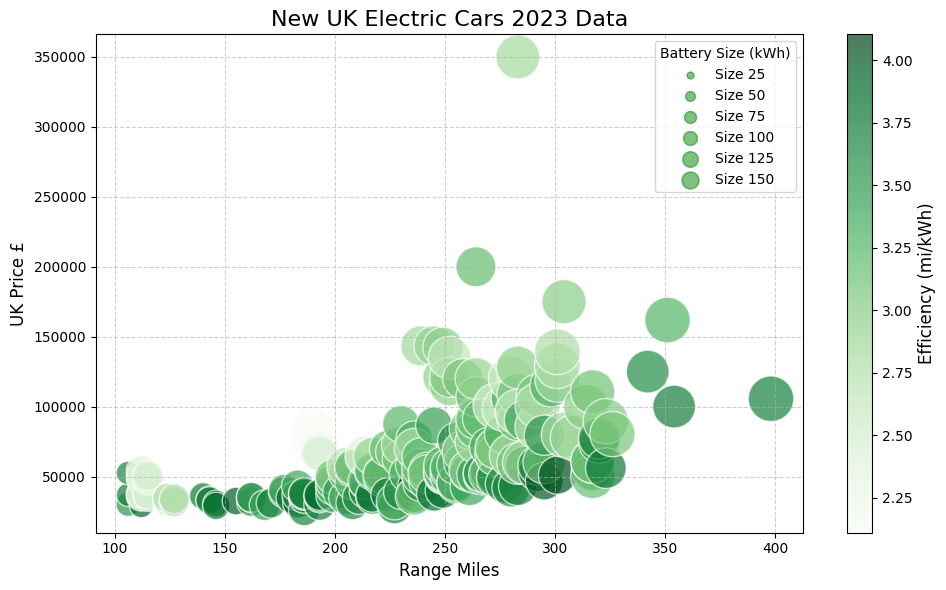

In [28]:
x=df_ecars['Range_mi']
y=df_ecars['UKPrice_£']
sizes=df_ecars['Battery_kWh']*10  # Scale sizes for better visibility
colors=df_ecars['Efficiency_mi/kWh']  # Color by efficiency

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, c=colors, cmap='Greens', alpha=0.7, edgecolors='w')

# Add labels and title
plt.title("New UK Electric Cars 2023 Data", fontsize=16)
plt.xlabel("Range Miles", fontsize=12)
plt.ylabel("UK Price £", fontsize=12)

# Add a color bar to indicate the color mapping
colorbar = plt.colorbar(scatter)
colorbar.set_label("Efficiency (mi/kWh)", fontsize=12)

# Add a legend for marker size
for size in [25, 50, 75, 100, 125, 150]:
    plt.scatter([], [], s=size, c='green', alpha=0.5, label=f"Size {size}")
plt.legend(title="Battery Size (kWh)", loc="upper right")

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



Can see from the above that as you'd expect in general cars with larger range cost more and have larger batteries, but this trend does not hold well at the smaller end which includes cars with relatively poor range and energy efficiency for the price, so buyers will need to carefully avoid such cars.  
One significant outlier costing £350K and one moderate outlier (£200K) which seem unlikely to result in being shown to be cost effective in subsequent analysis.  Could remove these later if this proves inappropriate to include in the dashboard etc. though there may be good reasons for having these cars on the market e.g. luxury.  These are identified immediately below.
Can also see a mix of higher and lower mi/kWh energy efficiencies across all size ranges i.e. not generally larger for small cars and lower for large cars as might have been anticipated, some larger cars also have good mi/kWh efficiency.

Examine cost outliers.  It can be seen that these are luxury high power cars and a quick internet search confirmed the prices seem in the right ball park.

In [29]:
df_ecars.sort_values(by=['UKPrice_£'], ascending=[False], inplace=False).head(2)

,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
163,164,Rolls-Royce Spectre,250 km/h,540 km/h,All Wheel Drive,4,350000,283,100.0,2.83
136,137,Maserati GranTurismo Folgore,320 km/h,990 km/h,All Wheel Drive,4,200000,264,83.0,3.180723


In [30]:
data = []
# Create a range of annual mileages from 2,500 to 40,000 in increments of 2,500 
# and nominal required ranges from 50 to 200 in increments of 50
for a in range(1, 16):
    for r in range(1, 5):
        row = [2500+2500*a, r*50]
        data.append(row)
        
        # Add the specific case of largest mileage range=238 being the max of 60% range of any car in the dataset
    row = [2500+2500*a,238] 
    data.append(row)

df_EcarModel = pd.DataFrame(data, columns=['Annual mileage','Nominal required range (miles)'])
df_EcarModel['Annual average daily mileage'] = df_EcarModel['Annual mileage']/365
# Increase required range where annual average daily mileage exceeds nominal required range
df_EcarModel['AdjustedRange'] = df_EcarModel[['Nominal required range (miles)', 'Annual average daily mileage']].max(axis=1)
# Size battery such that only 60% of nominal range is used to maximise battery longevity (80-20% charge cycle)
df_EcarModel['Required_Range'] = df_EcarModel['AdjustedRange'] /0.6 
df_EcarModel

,Annual mileage,Nominal required range (miles),Annual average daily mileage,AdjustedRange,Required_Range
0,5000,50,13.698630,50.000000,83.333333
1,5000,100,13.698630,100.000000,166.666667
2,5000,150,13.698630,150.000000,250.000000
3,5000,200,13.698630,200.000000,333.333333
4,5000,238,13.698630,238.000000,396.666667
...,...,...,...,...,...
70,40000,50,109.589041,109.589041,182.648402
71,40000,100,109.589041,109.589041,182.648402
72,40000,150,109.589041,150.000000,250.000000
73,40000,200,109.589041,200.000000,333.333333


In [31]:
pd.set_option('display.max_columns', 15)
df_EcarModel = pd.merge(df_EcarModel, df_ecars, how='cross')
df_EcarModel

,Annual mileage,Nominal required range (miles),Annual average daily mileage,AdjustedRange,Required_Range,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
0,5000,50,13.698630,50.0,83.333333,1,Mazda MX-30,140 km/h,210 km/h,Front Wheel Drive,5,30050,106,30.0,3.533333
1,5000,50,13.698630,50.0,83.333333,2,Honda e Advance,145 km/h,180 km/h,Rear Wheel Drive,4,36920,106,28.5,3.719298
2,5000,50,13.698630,50.0,83.333333,3,Mini Cooper SE Convertible,150 km/h,240 km/h,Front Wheel Drive,4,52500,106,28.9,3.66782
3,5000,50,13.698630,50.0,83.333333,4,Mini Cooper SE,150 km/h,260 km/h,Front Wheel Drive,4,29000,112,28.9,3.875433
4,5000,50,13.698630,50.0,83.333333,5,Citroen e-Jumpy Combi XL 50 kWh,130 km/h,290 km/h,Front Wheel Drive,7,35995,112,46.3,2.419006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,40000,238,109.589041,238.0,396.666667,194,Audi Q8 e-tron Sportback 55 quattro,200 km/h,710 km/h,All Wheel Drive,5,80300,326,106.0,3.075472
14846,40000,238,109.589041,238.0,396.666667,195,Tesla Model S Plaid,282 km/h,770 km/h,All Wheel Drive,5,125000,342,95.0,3.6
14847,40000,238,109.589041,238.0,396.666667,196,Mercedes EQS AMG 53 4MATIC+,250 km/h,840 km/h,All Wheel Drive,5,161860,351,107.8,3.25603
14848,40000,238,109.589041,238.0,396.666667,197,Tesla Model S Dual Motor,250 km/h,790 km/h,All Wheel Drive,5,100000,354,95.0,3.726316


Drop rows where cars are not suitable because they have insufficient range

In [32]:
df_EcarModel['Car_Suitable'] = df_EcarModel['Range_mi'] >= df_EcarModel['Required_Range']
df_EcarModel = df_EcarModel.drop(df_EcarModel[df_EcarModel['Car_Suitable'] == False].index)
df_EcarModel

,Annual mileage,Nominal required range (miles),Annual average daily mileage,AdjustedRange,Required_Range,ecarindex,Name,...,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh,Car_Suitable
0,5000,50,13.698630,50.0,83.333333,1,Mazda MX-30,...,Front Wheel Drive,5,30050,106,30.0,3.533333,True
1,5000,50,13.698630,50.0,83.333333,2,Honda e Advance,...,Rear Wheel Drive,4,36920,106,28.5,3.719298,True
2,5000,50,13.698630,50.0,83.333333,3,Mini Cooper SE Convertible,...,Front Wheel Drive,4,52500,106,28.9,3.66782,True
3,5000,50,13.698630,50.0,83.333333,4,Mini Cooper SE,...,Front Wheel Drive,4,29000,112,28.9,3.875433,True
4,5000,50,13.698630,50.0,83.333333,5,Citroen e-Jumpy Combi XL 50 kWh,...,Front Wheel Drive,7,35995,112,46.3,2.419006,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14648,40000,200,109.589041,200.0,333.333333,195,Tesla Model S Plaid,...,All Wheel Drive,5,125000,342,95.0,3.6,True
14649,40000,200,109.589041,200.0,333.333333,196,Mercedes EQS AMG 53 4MATIC+,...,All Wheel Drive,5,161860,351,107.8,3.25603,True
14650,40000,200,109.589041,200.0,333.333333,197,Tesla Model S Dual Motor,...,All Wheel Drive,5,100000,354,95.0,3.726316,True
14651,40000,200,109.589041,200.0,333.333333,198,Mercedes EQS 450+,...,Rear Wheel Drive,5,105610,398,107.8,3.692022,True


Set user variables

In [ ]:
HomeCharger=1 #0=No,1=Yes
loan=1 #0=No,1=Yes
interest_rate=0.075 #annual interest rate
NeworUsed=1 #1=New, 2=Used
AlternativePetrolCar=1 #1=Equivalent, 2=cheapest
EquivalentNewPetroltoEcarPriceRatio=0.8 #New Ecar price as a ratio of equivalent new petrol car price
EquivalentUsedPetroltoEcarPriceRatio=0.8 #Used Ecar price as a ratio of equivalent used petrol car price
AnnualServicingCost=2 #1=Low, 2=Med, 3=High
HomeChargerCost=1000 #£
NightChargeTime=7 #hours
ElecHomeNightRate=13.01 #p/kWh
ElecHomeDayRate=31.26 #p/kWh
ElecPublicChargerRate=51.00 #p/kWh
PetrolPrice=1.50 #£/litre



Add various additional calculated columns to df_EcarModel dataframe ultimately calculate cost saving for each range and annual mileage scenario for each Ecar in Cheapestelectriccars-EVDatabase_2023.csv

In [39]:
df_EcarModel['Utilised_battery_capacity_kWh'] = df_EcarModel['Required_Range']/df_EcarModel['Efficiency_mi/kWh']


df_EcarModel['Utilised_battery_capacity_kWh'].describe()

count        6701.0
mean      50.559224
std       18.881923
min       20.303672
25%       35.345141
50%       49.683479
75%       60.022148
max      107.438861
Name: Utilised_battery_capacity_kWh, dtype: Float64

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)